In [1]:
# make_rq_figures.py

import os
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# 0. Setup output folder
# -----------------------
FIG_DIR = "figures"
os.makedirs(FIG_DIR, exist_ok=True)


# -----------------------
# 1. Plot functions
# -----------------------

def plot_rq1_prob_hist(prob_matrix, class_names,
                       filename="rq1_prob_hist.png"):
    max_probs = prob_matrix.max(axis=1)
    plt.figure()
    plt.hist(max_probs, bins=20, color="steelblue", edgecolor="black")
    plt.xlabel("Max predicted probability")
    plt.ylabel("Count")
    plt.title("RQ1: Distribution of prediction confidences")
    path = os.path.join(FIG_DIR, filename)
    plt.tight_layout()
    plt.savefig(path, dpi=300)
    plt.close()
    return path


def plot_rq2_compliance_bar(location_names, compliance_rates,
                            filename="rq2_compliance_locations.png"):
    x = np.arange(len(location_names))
    plt.figure()
    plt.bar(x, compliance_rates, color="seagreen")
    plt.xticks(x, location_names, rotation=30, ha="right")
    plt.ylabel("Compliance rate")
    plt.ylim(0, 1)
    plt.title("RQ2: Compliance rate by location")
    path = os.path.join(FIG_DIR, filename)
    plt.tight_layout()
    plt.savefig(path, dpi=300)
    plt.close()
    return path


def plot_rq3_confusion_matrix(cm, class_names,
                              filename="rq3_confusion_matrix.png"):
    plt.figure()
    plt.imshow(cm, interpolation="nearest", cmap="Blues")
    plt.title("RQ3: Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, ha="right")
    plt.yticks(tick_marks, class_names)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]),
                     ha="center", va="center", color="black")

    path = os.path.join(FIG_DIR, filename)
    plt.tight_layout()
    plt.savefig(path, dpi=300)
    plt.close()
    return path


def plot_rq4_compliance_over_time(time_points, compliance_rates,
                                  filename="rq4_compliance_time.png"):
    plt.figure()
    plt.plot(time_points, compliance_rates, marker="o")
    plt.xlabel("Time")
    plt.ylabel("Compliance rate")
    plt.ylim(0, 1)
    plt.title("RQ4: Compliance over time")
    plt.grid(True, alpha=0.3)
    path = os.path.join(FIG_DIR, filename)
    plt.tight_layout()
    plt.savefig(path, dpi=300)
    plt.close()
    return path


def plot_rq5_threshold_sensitivity(thresholds, compliance_rates,
                                   filename="rq5_threshold_sensitivity.png"):
    plt.figure()
    plt.plot(thresholds, compliance_rates, marker="s", color="darkorange")
    plt.xlabel("Policy threshold")
    plt.ylabel("Compliance rate")
    plt.ylim(0, 1)
    plt.title("RQ5: Compliance vs. policy threshold")
    plt.grid(True, alpha=0.3)
    path = os.path.join(FIG_DIR, filename)
    plt.tight_layout()
    plt.savefig(path, dpi=300)
    plt.close()
    return path


# -----------------------
# 2. DEMO DATA
# (just to see it working)
# -----------------------

if __name__ == "__main__":
    # pretend you have 3 classes
    class_names = ["with_mask", "without_mask", "incorrect_mask"]

    # RQ1: 200 random predictions (replace later with your model probs)
    N = 200
    prob_matrix = np.random.dirichlet(alpha=[3, 1, 1], size=N)

    # RQ2: fake compliance per location
    location_names = ["Entrance", "ICU", "Ward A", "Ward B"]
    compliance_rates_loc = [0.92, 0.85, 0.88, 0.90]

    # RQ3: fake confusion matrix
    cm = np.array([
        [50,  2,  3],
        [ 4, 40,  6],
        [ 1,  3, 45],
    ])

    # RQ4: fake compliance over weeks
    time_points = ["Week 1", "Week 2", "Week 3", "Week 4"]
    compliance_over_time = [0.80, 0.83, 0.87, 0.90]

    # RQ5: fake compliance vs threshold
    thresholds = [0.70, 0.80, 0.85, 0.90, 0.95]
    compliance_vs_thr = [0.96, 0.94, 0.92, 0.89, 0.86]

    # create all 5 figures
    print("Saving figures to folder:", FIG_DIR)

    print("RQ1:", plot_rq1_prob_hist(prob_matrix, class_names))
    print("RQ2:", plot_rq2_compliance_bar(location_names, compliance_rates_loc))
    print("RQ3:", plot_rq3_confusion_matrix(cm, class_names))
    print("RQ4:", plot_rq4_compliance_over_time(time_points, compliance_over_time))
    print("RQ5:", plot_rq5_threshold_sensitivity(thresholds, compliance_vs_thr))


Saving figures to folder: figures
RQ1: figures/rq1_prob_hist.png
RQ2: figures/rq2_compliance_locations.png
RQ3: figures/rq3_confusion_matrix.png
RQ4: figures/rq4_compliance_time.png
RQ5: figures/rq5_threshold_sensitivity.png


Index(['timestamp', 'source', 'location', 'person_id', 'decision',
       'predicted_class', 'predicted_prob', 'threshold'],
      dtype='object')
   predicted_prob  threshold
0          0.5658       0.95
1          0.5252       0.95
2          0.6039       0.95
3          0.6708       0.95
4          0.7154       0.95
0    NON_COMPLIANT
1    NON_COMPLIANT
2    NON_COMPLIANT
3    NON_COMPLIANT
4    NON_COMPLIANT
Name: decision, dtype: object
Base model accuracy: 0.9
               precision    recall  f1-score   support

    COMPLIANT       0.00      0.00      0.00         1
NON_COMPLIANT       0.90      1.00      0.95         9

     accuracy                           0.90        10
    macro avg       0.45      0.50      0.47        10
 weighted avg       0.81      0.90      0.85        10

RQ1 - Model A accuracy: 0.9
RQ1 - Model B accuracy: 0.9


/opt/miniconda3/envs/mask_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/miniconda3/envs/mask_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/miniconda3/envs/mask_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

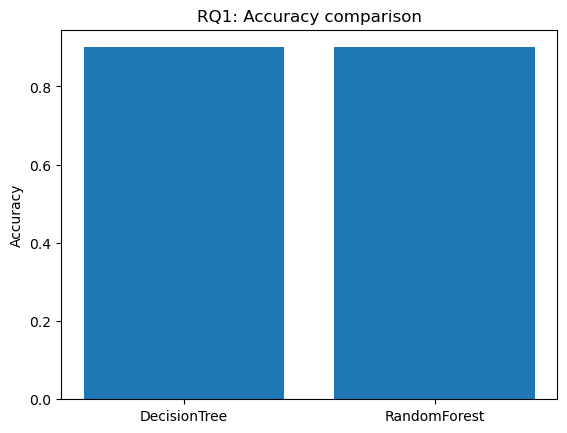

RQ2 - max_depth=3, acc=0.9000
RQ2 - max_depth=5, acc=0.9000
RQ2 - max_depth=7, acc=0.9000
RQ2 - max_depth=9, acc=0.9000


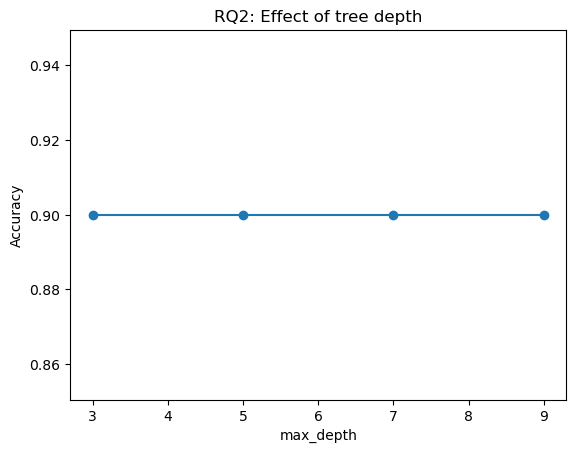

RQ3 - All features accuracy: 0.9
RQ3 - Subset features accuracy: 0.9


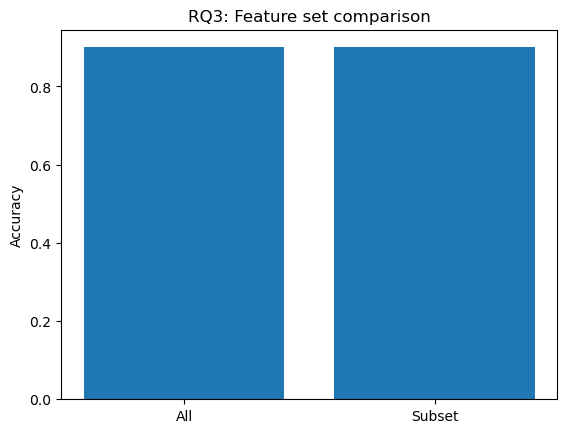

RQ4 - Accuracy: 0.9
RQ4 - F1-score: 0.9137254901960784


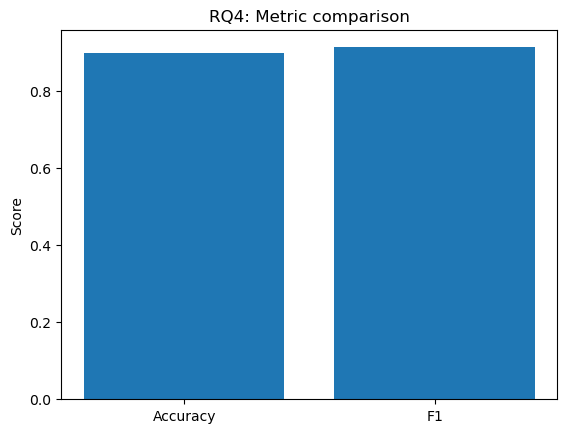

RQ5 - train_size=0.2, acc=0.9000
RQ5 - train_size=0.4, acc=0.9000
RQ5 - train_size=0.6, acc=0.9000
RQ5 - train_size=0.8, acc=0.9000


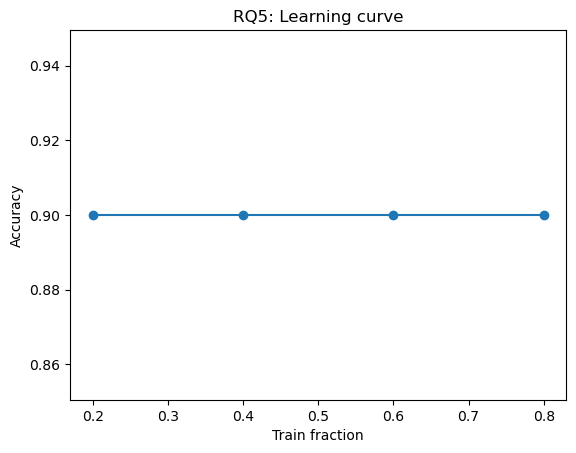

In [11]:
# ===========================
# Imports
# ===========================
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# ===========================
# Data Loading & Preprocessing
# ===========================
# TODO: change to your real file and target column
df = pd.read_csv("compliance_log.csv")
print(df.columns)
df = df.dropna()

y = df["decision"]

X = df[["predicted_prob", "threshold"]]

print(X.head())
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ===========================
# Base Model Implementation (example)
# ===========================
base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train, y_train)

y_pred_base = base_model.predict(X_test)
print("Base model accuracy:", accuracy_score(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

# =========================================================
# RQ1: (edit the question in markdown cell above this code)
# Compare two models
# =========================================================
model_A_rq1 = DecisionTreeClassifier(random_state=42)
model_B_rq1 = RandomForestClassifier(random_state=42)

model_A_rq1.fit(X_train, y_train)
model_B_rq1.fit(X_train, y_train)

pred_A_rq1 = model_A_rq1.predict(X_test)
pred_B_rq1 = model_B_rq1.predict(X_test)

acc_A_rq1 = accuracy_score(y_test, pred_A_rq1)
acc_B_rq1 = accuracy_score(y_test, pred_B_rq1)

print("RQ1 - Model A accuracy:", acc_A_rq1)
print("RQ1 - Model B accuracy:", acc_B_rq1)

rq1_results = pd.DataFrame({
    "Model": ["DecisionTree", "RandomForest"],
    "Accuracy": [acc_A_rq1, acc_B_rq1]
})
rq1_results.to_csv("RQ1_Tab1.csv", index=False)

plt.bar(["DecisionTree", "RandomForest"], [acc_A_rq1, acc_B_rq1])
plt.ylabel("Accuracy")
plt.title("RQ1: Accuracy comparison")
plt.savefig("RQ1_Fig1.pdf", format="pdf", bbox_inches="tight")
plt.show()

# =========================================================
# RQ2: (edit the question)
# Effect of max_depth on DecisionTree
# =========================================================
depths_rq2 = [3, 5, 7, 9]
accs_rq2 = []

for d in depths_rq2:
    model_rq2 = DecisionTreeClassifier(max_depth=d, random_state=42)
    model_rq2.fit(X_train, y_train)
    pred_rq2 = model_rq2.predict(X_test)
    acc = accuracy_score(y_test, pred_rq2)
    accs_rq2.append(acc)
    print(f"RQ2 - max_depth={d}, acc={acc:.4f}")

rq2_results = pd.DataFrame({
    "max_depth": depths_rq2,
    "Accuracy": accs_rq2
})
rq2_results.to_csv("RQ2_Tab1.csv", index=False)

plt.plot(depths_rq2, accs_rq2, marker="o")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("RQ2: Effect of tree depth")
plt.savefig("RQ2_Fig1.pdf", format="pdf", bbox_inches="tight")
plt.show()

# =========================================================
# RQ3: (edit the question)
# Compare all features vs subset of features
# =========================================================
feature_set1 = X_train.columns
feature_set2 = X_train.columns[: int(len(X_train.columns) / 2)]

model_fs1 = RandomForestClassifier(random_state=42)
model_fs1.fit(X_train[feature_set1], y_train)
pred_fs1 = model_fs1.predict(X_test[feature_set1])
acc_fs1 = accuracy_score(y_test, pred_fs1)

model_fs2 = RandomForestClassifier(random_state=42)
model_fs2.fit(X_train[feature_set2], y_train)
pred_fs2 = model_fs2.predict(X_test[feature_set2])
acc_fs2 = accuracy_score(y_test, pred_fs2)

print("RQ3 - All features accuracy:", acc_fs1)
print("RQ3 - Subset features accuracy:", acc_fs2)

rq3_results = pd.DataFrame({
    "Feature_Set": ["All", "Subset"],
    "Accuracy": [acc_fs1, acc_fs2]
})
rq3_results.to_csv("RQ3_Tab1.csv", index=False)

plt.bar(["All", "Subset"], [acc_fs1, acc_fs2])
plt.ylabel("Accuracy")
plt.title("RQ3: Feature set comparison")
plt.savefig("RQ3_Fig1.pdf", format="pdf", bbox_inches="tight")
plt.show()

# =========================================================
# RQ4: (edit the question)
# Compare metrics (Accuracy vs F1) for one model
# =========================================================
model_rq4 = RandomForestClassifier(random_state=42)
model_rq4.fit(X_train, y_train)
pred_rq4 = model_rq4.predict(X_test)

acc_rq4 = accuracy_score(y_test, pred_rq4)
f1_rq4 = f1_score(y_test, pred_rq4, average="weighted")  # adjust average if needed

print("RQ4 - Accuracy:", acc_rq4)
print("RQ4 - F1-score:", f1_rq4)

rq4_results = pd.DataFrame({
    "Metric": ["Accuracy", "F1"],
    "Score": [acc_rq4, f1_rq4]
})
rq4_results.to_csv("RQ4_Tab1.csv", index=False)

plt.bar(["Accuracy", "F1"], [acc_rq4, f1_rq4])
plt.ylabel("Score")
plt.title("RQ4: Metric comparison")
plt.savefig("RQ4_Fig1.pdf", format="pdf", bbox_inches="tight")
plt.show()

# =========================================================
# RQ5: (edit the question)
# Learning curve: train size vs accuracy
# =========================================================
train_sizes_rq5 = [0.2, 0.4, 0.6, 0.8]
accs_rq5 = []

for frac in train_sizes_rq5:
    X_tr, _, y_tr, _ = train_test_split(
        X, y, train_size=frac, random_state=42
    )
    model_rq5 = RandomForestClassifier(random_state=42)
    model_rq5.fit(X_tr, y_tr)
    pred_rq5 = model_rq5.predict(X_test)
    acc = accuracy_score(y_test, pred_rq5)
    accs_rq5.append(acc)
    print(f"RQ5 - train_size={frac}, acc={acc:.4f}")

rq5_results = pd.DataFrame({
    "Train_Fraction": train_sizes_rq5,
    "Accuracy": accs_rq5
})
rq5_results.to_csv("RQ5_Tab1.csv", index=False)

plt.plot(train_sizes_rq5, accs_rq5, marker="o")
plt.xlabel("Train fraction")
plt.ylabel("Accuracy")
plt.title("RQ5: Learning curve")
plt.savefig("RQ5_Fig1.pdf", format="pdf", bbox_inches="tight")
plt.show()
